#Importing Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits and Vegetables Image Recognition Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3121 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits and Vegetables Image Recognition Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 716s 7s/step - accuracy: 0.0292 - loss: 18.2806 - val_accuracy: 0.0285 - val_loss: 3.5833
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.0309 - loss: 3.5818 - val_accuracy: 0.0285 - val_loss: 3.5826
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.0297 - loss: 3.5794 - val_accuracy: 0.0313 - val_loss: 3.5772
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.0380 - loss: 3.5591 - val_accuracy: 0.0342 - val_loss: 3.5629
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.0510 - loss: 3.5309 - val_accuracy: 0.0456 - val_loss: 3.5419
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.0443 - loss: 3.5270 - val_accuracy: 0.0513 - val_loss: 3.5358
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.0497 - loss: 3.5209 - val_accuracy: 0.0427 - val_loss: 3.5402
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.0580 - loss: 3.4777 - val_accuracy: 0.0997 - 

##Evaluating Model

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 607s 6s/step - accuracy: 0.0307 - loss: 33.9406
Training accuracy: 0.0317206010222435


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.8176 - loss: 0.9014
Validation accuracy: 0.7948718070983887


##Saving Model

In [ ]:
cnn.save("trained_model.h5")

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.029157321900129318,
  0.03075937181711197,
  0.0317206010222435,
  0.03556552529335022,
  0.04293495789170265,
  0.047741107642650604,
  0.050945211201906204,
  0.0602371022105217,
  0.06728612631559372,
  0.09131688624620438,
  0.10669656842947006,
  0.12271707504987717,
  0.1396988183259964,
  0.16244792938232422,
  0.18455623090267181,
  0.2034604251384735,
  0.24351169168949127,
  0.24287088215351105,
  0.29573854804039,
  0.3197692930698395,
  0.3393143117427826,
  0.37872475385665894,
  0.403396338224411,
  0.4194168448448181,
  0.46459469199180603,
  0.5104133486747742,
  0.5197052359580994,
  0.5299583673477173,
  0.5559115409851074,
  0.5924383401870728,
  0.630887508392334,
  0.6219160556793213],
 'loss': [7.130805015563965,
  3.581692695617676,
  3.579522132873535,
  3.566899061203003,
  3.5453643798828125,
  3.5217349529266357,
  3.531212091445923,
  3.484757661819458,
  3.4537413120269775,
  3.386312246322632,
  3.3408050537109375,
  3.2708802223205566,
  3

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 79.48718070983887 %


#Accuracy Visualization

##Training Visualization

In [ ]:
training_history.history['accuracy']

[0.029157321900129318,
 0.03075937181711197,
 0.0317206010222435,
 0.03556552529335022,
 0.04293495789170265,
 0.047741107642650604,
 0.050945211201906204,
 0.0602371022105217,
 0.06728612631559372,
 0.09131688624620438,
 0.10669656842947006,
 0.12271707504987717,
 0.1396988183259964,
 0.16244792938232422,
 0.18455623090267181,
 0.2034604251384735,
 0.24351169168949127,
 0.24287088215351105,
 0.29573854804039,
 0.3197692930698395,
 0.3393143117427826,
 0.37872475385665894,
 0.403396338224411,
 0.4194168448448181,
 0.46459469199180603,
 0.5104133486747742,
 0.5197052359580994,
 0.5299583673477173,
 0.5559115409851074,
 0.5924383401870728,
 0.630887508392334,
 0.6219160556793213]

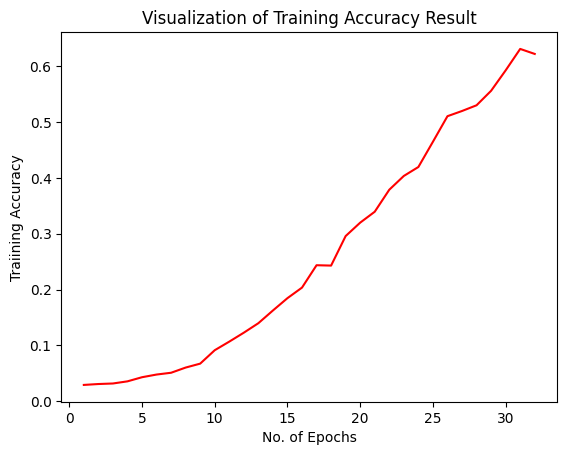

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

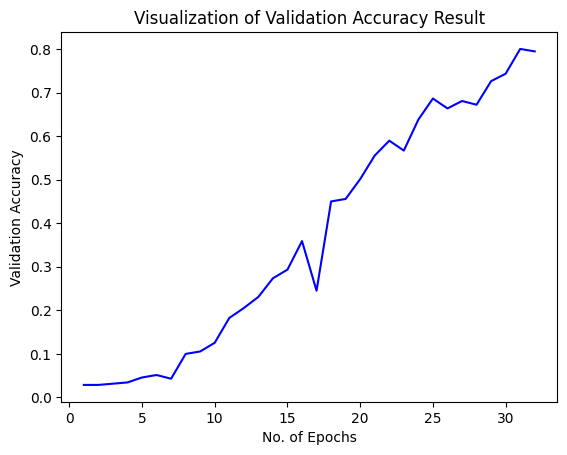

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruits and Vegetables Image Recognition Dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 69s 6s/step - accuracy: 0.7752 - loss: 1.3024
Test accuracy: 0.7938718795776367
